![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [92]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [93]:
penguins_df['sex']=penguins_df['sex'].astype('category')

In [94]:
penguins_dummies=pd.get_dummies(penguins_df['sex'])
penguins_dummies=pd.concat([penguins_df,penguins_dummies],axis=1)
penguins_dummies=penguins_dummies.drop("sex",axis=1)

In [95]:
penguins_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [106]:
scaler=StandardScaler()
penguins_standard=scaler.fit_transform(penguins_dummies)
penguins_standard

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394,
         0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  1.00604235,
        -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  1.00604235,
        -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363, -0.99399394,
         0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  1.00604235,
        -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985, -0.99399394,
         0.99399394]])

In [97]:
inertia=[]
for i in range(1,10):
    model=KMeans(n_clusters=i,random_state=42).fit(penguins_dummies)
    iner=model.inertia_
    inertia.append(iner)

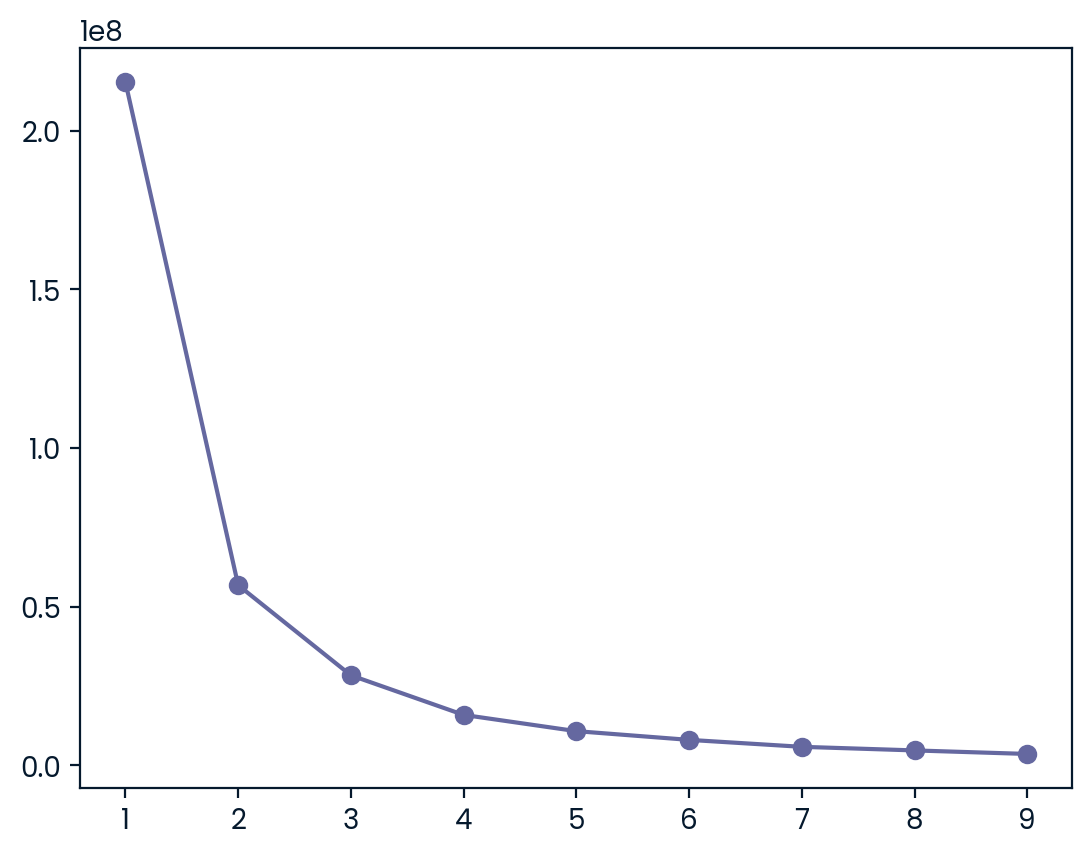

In [98]:
plt.plot(range(1,10),inertia,marker='o')
plt.show()

In [99]:
model=KMeans(n_clusters=4,random_state=42).fit(penguins_dummies)

In [100]:
model.labels_

array([3, 3, 1, 1, 3, 1, 0, 1, 3, 3, 1, 0, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 0, 1, 3, 1, 0, 1, 0, 1, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 1, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 0, 1,
       3, 3, 0, 1, 3, 3, 0, 1, 3, 1, 1, 3, 3, 1, 0, 3, 0, 1, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 0, 1, 1, 1, 3, 1, 3, 1, 3, 3, 0, 1,
       3, 1, 3, 1, 3, 3, 0, 1, 0, 3, 3, 1, 1, 3, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 3, 2, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

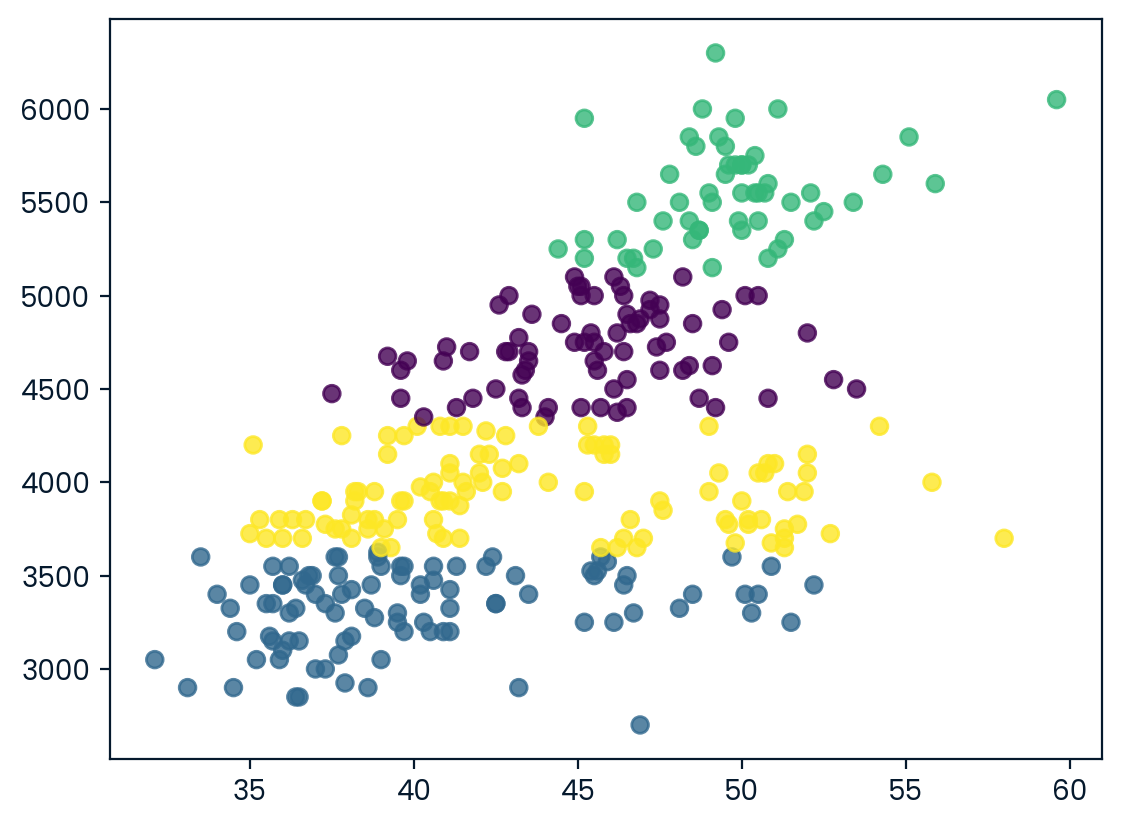

In [101]:
plt.scatter(x=penguins_dummies['culmen_length_mm'],y=penguins_dummies['body_mass_g'],c=model.labels_,alpha=0.8)

In [102]:
centroids=model.cluster_centers_
centroid_0 = centroids[0,:]
centroid_1 = centroids[1,:]
centroid_2 = centroids[2,:]
centroid_3 = centroids[3,:]

In [103]:
centroids

array([[4.54578947e+01, 1.56618421e+01, 2.09631579e+02, 4.71052632e+03,
        6.31578947e-01, 3.68421053e-01],
       [4.01010526e+01, 1.77431579e+01, 1.88557895e+02, 3.32789474e+03,
        8.42105263e-01, 1.57894737e-01],
       [4.96745455e+01, 1.57254545e+01, 2.21709091e+02, 5.54818182e+03,
        5.45454545e-02, 9.45454545e-01],
       [4.35707547e+01, 1.84339623e+01, 1.95141509e+02, 3.93632075e+03,
        3.20754717e-01, 6.79245283e-01]])

In [104]:
stat_penguins=pd.DataFrame({'culmen_length_mm':[centroid_0[0],centroid_1[0],centroid_2[0],centroid_3[0]],
               'culmen_depth_mm': [centroid_0[1],centroid_1[1],centroid_2[1],centroid_3[1]],
               'flipper_length_mm':[centroid_0[2],centroid_1[2],centroid_2[2],centroid_3[2]],
               'body_mass_g' : [centroid_0[3],centroid_1[3],centroid_2[3],centroid_3[3]],
               'FEMALE' : [centroid_0[4],centroid_1[4],centroid_2[4],centroid_3[4]],
               'MALE':  [centroid_0[5],centroid_1[5],centroid_2[5],centroid_3[5]]})

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,45.457895,15.661842,209.631579,4710.526316,0.631579,0.368421
1,40.101053,17.743158,188.557895,3327.894737,0.842105,0.157895
2,49.674545,15.725455,221.709091,5548.181818,0.054545,0.945455
3,43.570755,18.433962,195.141509,3936.320755,0.320755,0.679245
